In [14]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv("./dataset/Customers.csv")
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
49,50,Female,31,40,42
185,186,Male,30,99,97
142,143,Female,28,76,40
162,163,Male,19,81,5
8,9,Male,64,19,3


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
data.shape

(200, 5)

In [46]:
data = data.rename(columns={
    "CustomerID": "customer_id",
    "Gender": "gender",
    "Age": "age",
    "Annual Income (k$)": "income",
    "Spending Score (1-100)": "score"
})
data.columns

Index(['customer_id', 'gender', 'age', 'income', 'score'], dtype='object')

In [47]:
data_2 = data.copy()
data_2 = data_2[["income", "score"]]
data_2.sample(5)

,income,score
53,43,60
96,60,47
47,40,47
149,78,90
178,93,14


<br><br>
## Visualize Data

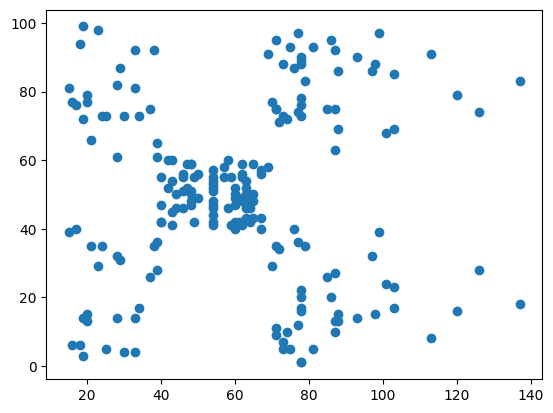

In [48]:
import matplotlib.pyplot as plt
plt.scatter(data_2["income"], data_2["score"])

<br><br>
## Finve best K value

In [49]:
from sklearn.cluster import KMeans

# Define K Values
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# WCSS Error
wcss_error = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data_2[["income", "score"]])
    wcss_error.append(model.inertia_)

wcss_error

[269981.28,
 184131.88502788503,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 37239.83554245604,
 31605.86838023088,
 25332.49145962733,
 23416.417438306373,
 19724.413115962056]

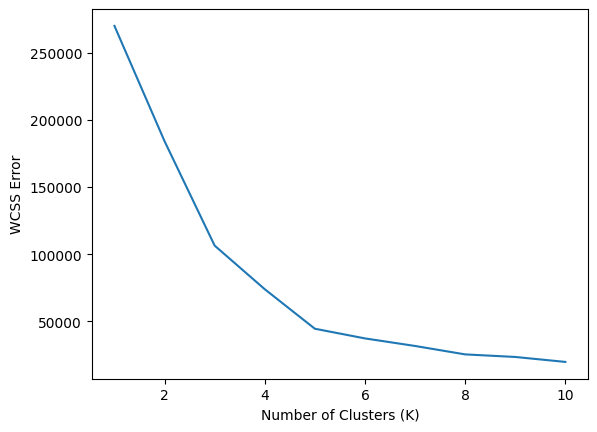

In [50]:
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS Error")
plt.plot(k_values, wcss_error)

<br><br>
## Cluster data (Train dataset)

In [51]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
predict = model.fit_predict(data_2)
predict

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [52]:
data_2.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [53]:
data_2["cluster"] = predict
data_2.head()

,income,score,cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [58]:
c1 = data_2[data_2["cluster"] == 0]
c2 = data_2[data_2["cluster"] == 1]
c3 = data_2[data_2["cluster"] == 2]
c4 = data_2[data_2["cluster"] == 3]
c5 = data_2[data_2["cluster"] == 4]

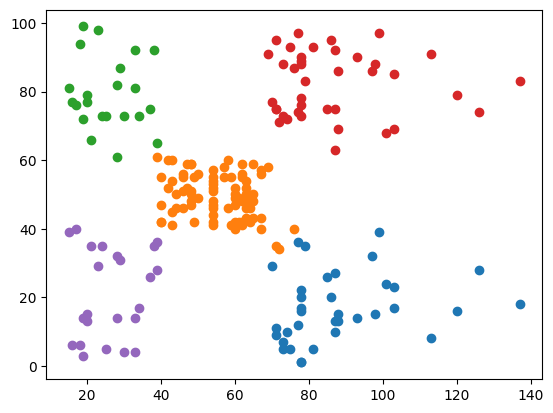

In [59]:
plt.scatter(c1["income"], c1["score"])
plt.scatter(c2["income"], c2["score"])
plt.scatter(c3["income"], c3["score"])
plt.scatter(c4["income"], c4["score"])
plt.scatter(c5["income"], c5["score"])

In [61]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

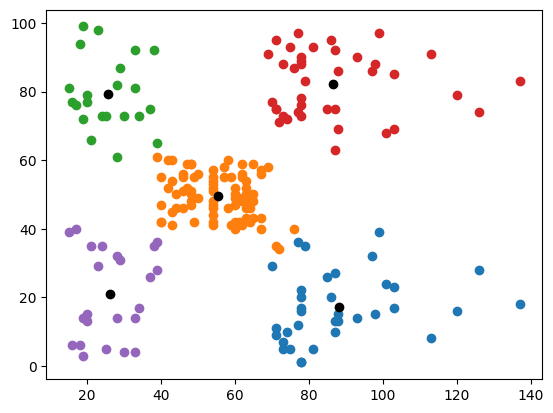

In [64]:
plt.scatter(c1["income"], c1["score"])
plt.scatter(c2["income"], c2["score"])
plt.scatter(c3["income"], c3["score"])
plt.scatter(c4["income"], c4["score"])
plt.scatter(c5["income"], c5["score"])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color="black")